In [1]:
import pandas as pd
import numpy as np

#Graficos
import seaborn as sns

#Escalado
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#Preprocesamiento
from sklearn.preprocessing import LabelEncoder

#---
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('../data/raw/enhanced_anxiety_dataset.csv')

test = pd.read_csv('../data/raw/family_anxiety_14_dataset.csv')

In [3]:
data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [5]:
data['Anxiety Level (1-10)'].value_counts()

Anxiety Level (1-10)
4.0     2416
3.0     2407
2.0     1756
5.0     1629
1.0     1039
6.0      616
8.0      363
9.0      329
10.0     322
7.0      123
Name: count, dtype: int64

In [6]:
bins = [0, 5, 10]  
labels = [0, 1]
data['Anxiety_Group'] = pd.cut(
    data['Anxiety Level (1-10)'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
).astype(int)

In [7]:
'''rus = RandomUnderSampler(random_state=42)

data, y_res = rus.fit_resample(data, data['Anxiety_Group'])

data['Anxiety_Group'] = y_res'''

"rus = RandomUnderSampler(random_state=42)\n\ndata, y_res = rus.fit_resample(data, data['Anxiety_Group'])\n\ndata['Anxiety_Group'] = y_res"

In [8]:
data = data.drop(columns='Anxiety Level (1-10)')

In [9]:
data

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety_Group
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,Female,Engineer,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,1
10996,50,Other,Teacher,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,0
10997,29,Male,Nurse,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,0
10998,53,Other,Artist,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,0


In [10]:
data['Anxiety_Group'].value_counts()

Anxiety_Group
0    9247
1    1753
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

**Gender**
Male(0)
Female(1)
Other(2)

In [12]:
gender_dummies = pd.get_dummies(data["Gender"], prefix="Gender")

data = pd.concat([data.drop(columns=["Gender"]), gender_dummies], axis=1)

In [13]:
gender_dummies = pd.get_dummies(test["Gender"], prefix="Gender")

test = pd.concat([test.drop(columns=["Gender"]), gender_dummies], axis=1)

**Occupation**
- Artist     
- Scientist  
- Student    
- Freelancer 
- Engineer   
- Other      
- Nurse      
- Musician   
- Teacher    
- Chef       
- Athlete    
- Lawyer     
- Doctor     

In [14]:
data = pd.get_dummies(data, columns=['Occupation'])

In [15]:
data = data.replace({True: 1, False: 0})

C:\Users\anear\AppData\Local\Temp\ipykernel_2384\3013327828.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [16]:
test = pd.get_dummies(test, columns=['Occupation'])

In [17]:
test = test.replace({True: 1, False: 0})

C:\Users\anear\AppData\Local\Temp\ipykernel_2384\552238954.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test = test.replace({True: 1, False: 0})


**Smoking**
No     (0)
Yes     (1)

In [18]:
le = LabelEncoder()

In [19]:
data['Smoking'] = le.fit_transform(data['Smoking'])

In [20]:
test['Smoking'] = le.fit_transform(test['Smoking'])

**Family History of Anxiety**
No     (0)
Yes     (1)

In [21]:
data['Family History of Anxiety'] = le.fit_transform(data['Family History of Anxiety'])

In [22]:
test['Family History of Anxiety'] = le.fit_transform(test['Family History of Anxiety'])

**Dizziness**
No     0
Yes     1

In [23]:
data['Dizziness'] = le.fit_transform(data['Dizziness'])

In [24]:
test['Dizziness'] = le.fit_transform(test['Dizziness'])

**Medication**
- Yes (1)
- No (0)

In [25]:
data['Medication'] = le.fit_transform(data['Medication'])

In [26]:
test['Medication'] = le.fit_transform(test['Medication'])

**Recent Major Life Event**
Yes (1) No (0)

In [27]:
data['Recent Major Life Event'] = le.fit_transform(data['Recent Major Life Event'])

In [28]:
test['Recent Major Life Event'] = le.fit_transform(test['Recent Major Life Event'])

In [29]:
smote = SMOTE(random_state=42)

# Aplicar el resampling
X_res, y_res = smote.fit_resample(data.drop('Anxiety_Group', axis=1), data['Anxiety_Group'])

# Reconstruir el DataFrame con la columna objetivo
data = X_res.copy()
data['Anxiety_Group'] = y_res

In [30]:
#sns.pairplot(data);

In [31]:
data.corr(numeric_only=True)

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher,Anxiety_Group
Age,1.000000,0.036684,0.126331,-0.123489,-0.054809,-0.024537,-0.048506,-0.095381,-0.101551,-0.076294,...,0.022688,-0.004505,0.038602,0.024818,0.025811,0.015254,0.029270,0.025404,0.019764,-0.137980
Sleep Hours,0.036684,1.000000,0.382546,-0.402265,-0.128332,-0.034436,-0.094165,-0.355948,-0.316868,-0.265960,...,0.071872,0.083602,0.067928,0.076394,0.088519,0.086963,0.086483,0.079919,0.085218,-0.582367
Physical Activity (hrs/week),0.126331,0.382546,1.000000,-0.267760,-0.078742,-0.026512,-0.059363,-0.232973,-0.209748,-0.185048,...,0.041054,0.048827,0.049310,0.042379,0.047428,0.059163,0.058080,0.053137,0.046661,-0.357890
Caffeine Intake (mg/day),-0.123489,-0.402265,-0.267760,1.000000,0.070665,0.005524,0.069391,0.259183,0.180037,0.203233,...,0.154469,-0.083316,0.156852,-0.189726,-0.095374,-0.221830,0.154709,-0.095691,-0.218018,0.432351
Alcohol Consumption (drinks/week),-0.054809,-0.128332,-0.078742,0.070665,1.000000,0.010485,0.015686,0.080745,0.070527,0.058959,...,-0.030070,-0.001321,-0.010260,-0.018358,-0.025799,-0.025708,-0.022295,-0.019129,-0.011191,0.110489
Smoking,-0.024537,-0.034436,-0.026512,0.005524,0.010485,1.000000,0.021502,-0.039356,0.021448,0.048480,...,0.027397,0.026134,0.013817,0.029313,0.018082,0.022580,0.012989,0.027120,0.019425,-0.068439
Family History of Anxiety,-0.048506,-0.094165,-0.059363,0.069391,0.015686,0.021502,1.000000,0.023978,0.073564,0.052593,...,0.017724,0.006387,0.009922,-0.001439,-0.007891,-0.003185,-0.020679,0.011098,-0.008552,0.042643
Stress Level (1-10),-0.095381,-0.355948,-0.232973,0.259183,0.080745,-0.039356,0.023978,1.000000,0.173098,0.124687,...,-0.081279,-0.081702,-0.067406,-0.080395,-0.077415,-0.082270,-0.084975,-0.083281,-0.080399,0.625452
Heart Rate (bpm),-0.101551,-0.316868,-0.209748,0.180037,0.070527,0.021448,0.073564,0.173098,1.000000,0.145394,...,-0.041138,-0.037881,-0.053338,-0.022156,-0.043097,-0.029719,-0.049968,-0.043080,-0.025382,0.257637
Breathing Rate (breaths/min),-0.076294,-0.265960,-0.185048,0.203233,0.058959,0.048480,0.052593,0.124687,0.145394,1.000000,...,-0.028162,0.000204,-0.042938,-0.012830,-0.043406,-0.027327,-0.042952,-0.019248,-0.030394,0.203299


In [32]:
corr = data.corr()

anxiety_corr = corr['Anxiety_Group'].sort_values(ascending=False)

print(anxiety_corr)

Anxiety_Group                        1.000000
Stress Level (1-10)                  0.625452
Therapy Sessions (per month)         0.519335
Caffeine Intake (mg/day)             0.432351
Heart Rate (bpm)                     0.257637
Breathing Rate (breaths/min)         0.203299
Sweating Level (1-5)                 0.122427
Alcohol Consumption (drinks/week)    0.110489
Family History of Anxiety            0.042643
Dizziness                           -0.039737
Recent Major Life Event             -0.060281
Smoking                             -0.068439
Occupation_Lawyer                   -0.099307
Occupation_Scientist                -0.104308
Occupation_Doctor                   -0.113613
Occupation_Engineer                 -0.118740
Occupation_Athlete                  -0.126185
Medication                          -0.128825
Occupation_Freelancer               -0.129305
Occupation_Chef                     -0.135456
Age                                 -0.137980
Occupation_Artist                 

In [33]:
data.to_csv('../data/processed/anxiety_processed.csv')

In [34]:
train, test = train_test_split(data, test_size=0.1, random_state=42)
test.to_csv('../data/train_test/anxiety_test.csv', index=False)

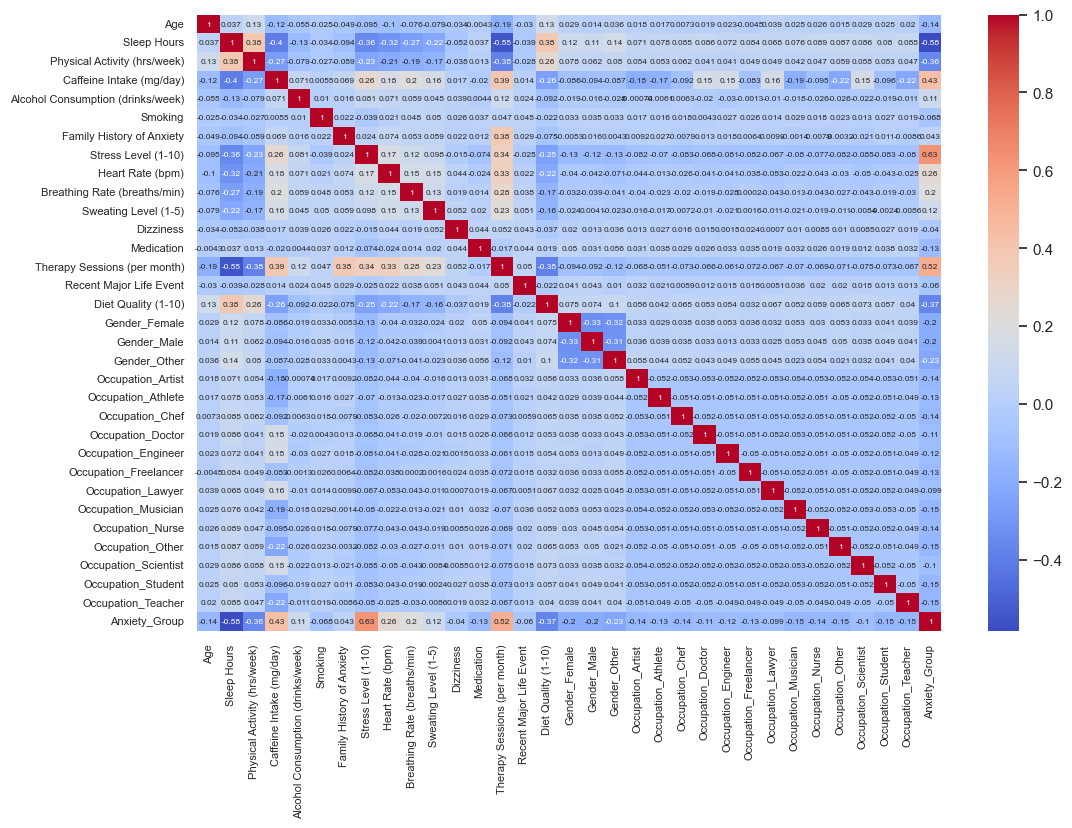

In [35]:
sns.set(rc={'figure.figsize':(12,8)})

sns.heatmap(data.corr(), annot=True, cmap="coolwarm", annot_kws={"size":6})

import matplotlib.pyplot as plt
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [ ]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
scaler.transform(train)

array([[ 0.32032933, -0.29334448, -0.41640537, ..., -0.23126694,
        -0.22764011, -0.21783303],
       [-0.16414519, -1.28781675, -1.37361144, ..., -0.23126694,
        -0.22764011, -0.21783303],
       [ 0.40107508, -0.66194712, -0.63232454, ..., -0.23126694,
        -0.22764011, -0.21783303],
       ...,
       [-0.24489094, -0.29334448,  1.03411011, ..., -0.23126694,
        -0.22764011, -0.21783303],
       [ 0.56256659,  1.32312438,  1.20817196, ..., -0.23126694,
        -0.22764011, -0.21783303],
       [-0.16414519, -0.64595675, -1.21529651, ..., -0.23126694,
        -0.22764011, -0.21783303]], shape=(16644, 32))

In [40]:
train.to_csv('../data/train_test/anxiety_train.csv', index=False)